In [1]:
import pandas as pd
import numpy as np
import yaml
import copy
import matplotlib
import matplotlib.pyplot as plt
import warnings
import random
import collections
warnings.filterwarnings("ignore")
matplotlib.use('TkAgg')
import networkx as nx
%matplotlib inline

In [2]:
pwd

'/Users/nishant/Desktop/PNNL-2019/Flood_Failure'

In [3]:
def import_network(path):
    """
    path = path to network data
    df = imported network data as a pandas dataframe
    """
    
    df = pd.read_csv(path, sep=" ", 
                 header=None,
                 names=['layer','node1','node2','weight'])
    
    return df


def create_edge_list(df, n_layers):
    
    edges = []
    for i in range(n_layers):
        edges.append(list(zip(df["node1"][df.layer==i+1], df["node2"][df.layer==i+1])))
    
    return edges


def calculate_gc_size(graph):
    """
    gc = giant component
    """
    
    gc_size = [len(c) for c in sorted(nx.connected_components(graph), key=len, reverse=True)][0]
    
    return gc_size


def calculate_diameter(graph):
    return nx.diameter(graph)

def normalize_gc_list(gc_list):
    
    return np.array(gc_list)/max(gc_list)

In [4]:
if __name__ == "__main__":
    
    with open("config.yml", 'r') as f:
        config = yaml.safe_load(f)
        path = config['path']
        n_layers = config['n_layers']
        df = import_network(path)
        edges = create_edge_list(df, n_layers)
        

In [5]:
layer_1 = 1
layer_2 = 2
layer_3 = 3

edge_list_1 = edges[layer_1-1]
edge_list_2 = edges[layer_2-1]
edge_list_3 = edges[layer_3-1]

agg_edges = list(set(edge_list_1 + edge_list_2 + edge_list_3))


print(len(edge_list_1))
print(len(edge_list_2))
print(len(edge_list_3))
print(len(agg_edges))


312
83
46
430


In [6]:
def node_list(df, layer):
    
    temp = list(set(df.node1[df.layer==layer]))
    temp2 = list(set(df.node2[df.layer==layer]))
    node_list = list(set(temp+temp2))
    
    return node_list

In [7]:
node_list_1 = node_list(df, layer_1)
node_list_2 = node_list(df, layer_2)
node_list_3 = node_list(df, layer_3)

print(len(node_list_1))
print(len(node_list_2))
print(len(node_list_3))



271
83
45


In [8]:
G1 = nx.Graph()
G1.add_edges_from(edge_list_1)

G2 = nx.Graph()
G2.add_edges_from(edge_list_2)

G3 = nx.Graph()
G3.add_edges_from(edge_list_3)

agg_G = nx.Graph()
agg_G.add_edges_from(agg_edges)

In [9]:
# plt.figure(figsize=(20,15))
# nx.draw(agg_G)
# plt.title('Aggregated London Public Rail Transport Network', fontsize=24)
# plt.savefig('Aggregated_Network.png', format='png')
# plt.show()

In [10]:
G = agg_G
edge_list = agg_edges

node_list = list(range(len(list(G.nodes))))
len(node_list)

369

In [11]:
def calculate_gc_size(graph):
    """
    gc = giant component
    """
    
    gc_size = [len(c) for c in sorted(nx.connected_components(graph), key=len, reverse=True)][0]
    
    return gc_size


def calculate_diameter(graph):
    
    return nx.diameter(graph)


def n_connected_components(graph):
    
    return nx.number_connected_components(graph)


def normalize_gc_list(gc_list):
    
    return np.array(gc_list)/max(gc_list)

In [12]:
initial_gc_size = calculate_gc_size(G)
print(initial_gc_size)

369


In [13]:
"""

#Create all sorted node lists here for removal/addition

#DEGREE
sorted_nodes_by_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)
sorted_nodes_by_degree = [i[0] for i in sorted_nodes_by_degree]


#BETWEENNESS
betweenness_c = nx.betweenness_centrality(G)
temp = sorted(betweenness_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_betweenness = [i[0] for i in temp]


#EIGENVALUE
eigen_c = nx.eigenvector_centrality_numpy(G)
temp = sorted(eigen_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_eigenc = [i[0] for i in temp]

#CLOSENESS
closeness_c = nx.closeness_centrality(G)
temp = sorted(closeness_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_closeness = [i[0] for i in temp]

#CLUSTERING
clustering_c = nx.clustering(G)
temp = sorted(clustering_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_clustering = [i[0] for i in temp]


print(sorted_nodes_by_clustering)
print('\n', len(sorted_nodes_by_clustering))

""";

In [14]:
"""#RANDOM

node_list_copy = copy.deepcopy(node_list)
random.shuffle(node_list_copy)
sorted_nodes_by_random = node_list_copy
print(len(sorted_nodes_by_random), '\n')
print(sorted_nodes_by_random)
""";

"""RANDOM"""
# node_list_copy = copy.deepcopy(node_list)

# sorted_nodes_by_random = []

# for i in range(1000):
#     sorted_nodes_by_random.append(random.sample(node_list_copy, len(node_list_copy)))


'RANDOM'

In [15]:

def remove_nodes(G, nodes_to_remove, edge_list):

    """
    nodes_to_remove: list

    edge_list: for this layer the orginal list of tuples (edges)
                e.g. [(1,77), (4,13)..]

    returns list of GC sizes as the network fails and the graph remaining 
    """

    
    """initialize updated_edges list with original edge_list"""
    updated_edges = copy.deepcopy(edge_list)
    
    """initialize updated_G with orginial graph G"""
    updated_G = copy.deepcopy(G)
    initial_gc_size = calculate_gc_size(G)
    
    """empty list which will capture gc size as the network fails"""
    gc_list = []
    #gc_list.append(initial_gc_size)
    count = 0

    for node in nodes_to_remove:
        
        updated_G.remove_edges_from(list(G.edges(node)))
        
        gc_list.append(calculate_gc_size(updated_G))
        updated_G.remove_node(node)
    
        count +=1
    
    #else:
     #   gc_list.append(0)
    
    return gc_list, updated_G, count


"""
def remove_nodes(G, nodes_to_remove, edge_list):

   
    nodes_to_remove: list

    edge_list: orginal list of tuples (edges)
                e.g. [(1,77), (4,13)..]

    updated_edges: updated list of tuples

   

    #nodes_to_remove = sorted_nodes_by_degree
    updated_edges = copy.deepcopy(edge_list)
    updated_G = copy.deepcopy(G)
    gc_list = []
    count = 0

    for node in nodes_to_remove:
        for edge in edge_list:
            if node in edge:
                if edge in updated_edges:

                    updated_edges.remove(edge)
                    updated_G.remove_edge(*edge)

        else:
            gc_list.append(n_connected_components(updated_G))
            #updated_G.remove_node(node)

        count +=1
    
    #gc_list = np.array(gc_list)/max(gc_list)
    
    return gc_list, updated_G, count

""";

In [16]:
"""

#FAILURE

nodes_to_remove = sorted_nodes_by_degree
gc_list_by_degree, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

nodes_to_remove = sorted_nodes_by_betweenness
gc_list_by_betweenness, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

nodes_to_remove = sorted_nodes_by_eigenc
gc_list_by_eigenc, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

nodes_to_remove = sorted_nodes_by_closeness
gc_list_by_closeness, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

nodes_to_remove = sorted_nodes_by_clustering
gc_list_by_clustering, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

""";

In [22]:
#FAILURE

"""RANDOM"""

# gc_list_by_random = []
# updated_G_list = []

# for i in range(1000):
#     nodes_to_remove = sorted_nodes_by_random[i]
#     gc_temp, updated_G_temp, count = remove_nodes(G, nodes_to_remove, edge_list)
#     gc_list_by_random.append(normalize_gc_list(gc_temp))
#     updated_G_list.append(updated_G_temp)


'RANDOM'

In [17]:
#FAILURE - FOODS

#aggregate 
node_list_floods = [106, 6, 221, 345, 35, 180, 56, 69, 343, 44, 261, 57, 102, 214, 70, 
                    176, 277, 257, 351, 90, 105, 132, 172, 316, 195, 202, 203, 349, 328, 
                    241, 319, 337, 103, 333, 129, 254, 218, 352, 347, 12, 65, 290, 324, 50, 
                    51, 325, 146, 66, 104, 239, 107, 108, 142, 323, 136, 137, 256, 143, 144, 
                    145, 154, 197, 155, 269, 291]

#layer 1
#node_list_floods = [106, 6,221,345,35,180,56,69,343,44,261,57,102,214,70,176,277,257,351,90,105,132,172,316,195,202,203,349,328,241,319]

#layer 2
#node_list_floods = [337, 103, 333, 129, 254, 218]

#layer 3
#node_list_floods = [352, 347, 12, 65, 290, 324,50,51,325,146,66,104,239,107,108,142,323,136,137,256,143,144,145,154,197,155,269,291]


print(len(node_list_floods))

sorted_nodes_by_floods = []

iter = 1

for i in range(iter):
    sorted_nodes_by_floods.append(random.sample(node_list_floods, len(node_list_floods)))


gc_list_by_floods = []
updated_G_list = []

for i in range(iter):
    nodes_to_remove = sorted_nodes_by_floods[i]
    gc_temp, updated_G_temp, count = remove_nodes(G, nodes_to_remove, edge_list)
    gc_list_by_floods.append(normalize_gc_list(gc_temp))
    updated_G_list.append(updated_G_temp)


65


In [18]:
len(gc_list_by_floods[0])

65

In [19]:
def add_nodes(G, updated_G, nodes_to_add, edge_list):
    
    """re: recovery
    """
    
    """initialize the graph object with the graph (updated_G) remaining post failure"""
    re_updated_G = copy.deepcopy(updated_G)
    edges_to_add = copy.deepcopy(edge_list)
     
    """empty list which will capture gc size as the network recovers"""
    re_gc_list = []
    count = 0
    initial_gc_size = calculate_gc_size(G)
    
    #re_gc_list.append(0)
    
    for node in nodes_to_add:
        
        re_updated_G.add_node(node)
        re_updated_G.add_edges_from(list(G.edges(node)))
        re_gc_list.append(calculate_gc_size(re_updated_G))
    
    
    #re_gc_list.append(initial_gc_size)
    
    return re_gc_list, re_updated_G, count


"""
def add_nodes(G, updated_G, nodes_to_add, edge_list):
    
    
    re_updated_G = copy.deepcopy(updated_G)
    edges_to_add = copy.deepcopy(edge_list)
     
    re_gc_list = []
    count = 0

    for node in nodes_to_add:

        re_updated_G.add_node(node)

        for edge in edges_to_add:
            if node in edge:
                re_updated_G.add_edge(*edge)

        else:
            re_gc_list.append(n_connected_components(re_updated_G))
            count +=1
               
    #re_gc_list = np.array(re_gc_list)/max(re_gc_list)
    
    return re_gc_list, re_updated_G, count

""";

In [26]:
"""
#RECOVERY


nodes_to_add = sorted_nodes_by_degree
re_gc_list_by_degree, re_updated_G, count = add_nodes(updated_G, nodes_to_add, edge_list)

nodes_to_add = sorted_nodes_by_betweenness
re_gc_list_by_betweenness, re_updated_G, count = add_nodes(updated_G, nodes_to_add, edge_list)

nodes_to_add = sorted_nodes_by_eigenc
re_gc_list_by_eigenc, re_updated_G, count = add_nodes(updated_G, nodes_to_add, edge_list)

nodes_to_add = sorted_nodes_by_closeness
re_gc_list_by_closeness, re_updated_G, count = add_nodes(updated_G, nodes_to_add, edge_list)

nodes_to_add = sorted_nodes_by_clustering
re_gc_list_by_clustering, re_updated_G, count = add_nodes(updated_G, nodes_to_add, edge_list)
""";

In [27]:
#RECOVERY - RANDOM

#Nodes to Add

# re_gc_list_by_random = []
# re_updated_G_list = []

# for i in range(1000):
#     nodes_to_add = sorted_nodes_by_random[i]
#     re_gc_temp, re_updated_G_temp, count = add_nodes(G, updated_G_list[i], nodes_to_add, edge_list)
#     re_gc_list_by_random.append(normalize_gc_list(re_gc_temp))
#     re_updated_G_list.append(updated_G_temp)


In [20]:
#RECOVERY - FLOODS

#Nodes to Add

re_gc_list_by_floods = []
re_updated_G_list = []

for i in range(iter):
    nodes_to_add = sorted_nodes_by_floods[i]
    re_gc_temp, re_updated_G_temp, count = add_nodes(G, updated_G_list[i], nodes_to_add, edge_list)
    re_gc_list_by_floods.append(normalize_gc_list(re_gc_temp))
    re_updated_G_list.append(updated_G_temp)


In [21]:
len(re_gc_list_by_floods[0])

65

In [22]:
"""

gc_list_by_random.insert(0,1)
#gc_list_by_random.append(0)
#gc_list_by_random = normalize_gc_list(gc_list_by_random)


gc_list_by_degree.insert(0,1)
#gc_list_by_degree.append(0)
#gc_list_by_degree = normalize_gc_list(gc_list_by_degree)

gc_list_by_betweenness.insert(0,1)
#gc_list_by_betweenness.append(0)
#gc_list_by_betweenness = normalize_gc_list(gc_list_by_betweenness)

gc_list_by_eigenc.insert(0,1)
#gc_list_by_eigenc.append(0)
#gc_list_by_eigenc = normalize_gc_list(gc_list_by_eigenc)

gc_list_by_closeness.insert(0,1)
#gc_list_by_closeness.append(0)
#gc_list_by_closeness = normalize_gc_list(gc_list_by_closeness)

gc_list_by_clustering.insert(0,1)
#gc_list_by_clustering.append(0)
#gc_list_by_clustering = normalize_gc_list(gc_list_by_clustering)

#print(gc_list_by_)


""";

In [23]:
"""
#re_gc_list_by_random.insert(0,0)
re_gc_list_by_random.append(1)
#re_gc_list_by_random = normalize_gc_list(re_gc_list_by_random)


#re_gc_list_by_degree.insert(0,0)
re_gc_list_by_degree.append(1)
#re_gc_list_by_degree = normalize_gc_list(re_gc_list_by_degree)

#re_gc_list_by_betweenness.insert(0,0)
re_gc_list_by_betweenness.append(1)
#re_gc_list_by_betweenness = normalize_gc_list(re_gc_list_by_betweenness)

#re_gc_list_by_eigenc.insert(0,0)
re_gc_list_by_eigenc.append(1)
#re_gc_list_by_eigenc = normalize_gc_list(re_gc_list_by_eigenc)

#re_gc_list_by_closeness.insert(0,0)
re_gc_list_by_closeness.append(1)
#re_gc_list_by_closeness = normalize_gc_list(re_gc_list_by_closeness)

#re_gc_list_by_clustering.insert(0,0)
re_gc_list_by_clustering.append(1)
#re_gc_list_by_clustering = normalize_gc_list(re_gc_list_by_clustering)

""";

In [24]:
"""

#EXTRACT GC SIZE LISTS

np.save('agg_gc_list_by_random', gc_list_by_random)
np.save('agg_re_gc_list_by_random', re_gc_list_by_random)

np.save('agg_gc_list_by_degree', gc_list_by_degree)
np.save('agg_re_gc_list_by_degree', re_gc_list_by_degree)

np.save('agg_gc_list_by_betweenness', gc_list_by_betweenness)
np.save('agg_re_gc_list_by_betweenness', re_gc_list_by_betweenness)

np.save('agg_gc_list_by_eigenc', gc_list_by_eigenc)
np.save('agg_re_gc_list_by_eigenc', re_gc_list_by_eigenc)

np.save('agg_gc_list_by_closeness', gc_list_by_closeness)
np.save('agg_re_gc_list_by_closeness', re_gc_list_by_closeness)

np.save('agg_gc_list_by_clustering', gc_list_by_clustering)
np.save('agg_re_gc_list_by_clustering', re_gc_list_by_clustering)

""";

In [25]:
#Ensemble Mean - Random

# gc_array_by_random = np.array(gc_list_by_random)
# re_gc_array_by_random = np.array(re_gc_list_by_random)


# gc_by_random_mean = np.mean(gc_array_by_random, axis=0)
# re_gc_by_random_mean = np.mean(re_gc_array_by_random, axis=0)



In [26]:
#Ensemble Mean - Floods

gc_array_by_floods = np.array(gc_list_by_floods)
re_gc_array_by_floods = np.array(re_gc_list_by_floods)


gc_by_floods_mean = np.mean(gc_array_by_floods, axis=0)
re_gc_by_floods_mean = np.mean(re_gc_array_by_floods, axis=0)



In [27]:
#Saving All Interations

# np.save('agg_gc_list_by_floods', gc_array_by_floods)
# np.save('agg_re_gc_list_by_floods', re_gc_array_by_floods)



In [28]:
#Saving Ensemnle Means

# np.save('agg_gc_mean_by_floods', gc_by_floods_mean)
# np.save('agg_re_gc_mean_by_floods', re_gc_by_floods_mean)

In [29]:

#np.save('agg_gc_list_by_random', gc_by_random_mean)
#np.save('agg_re_gc_list_by_random', re_gc_by_random_mean)

In [30]:
l1_node_frac = np.arange(31)
l2_node_frac = np.arange(6)
l3_node_frac = np.arange(28)
agg_node_frac = np.arange(65)

print(len(l1_node_frac))
len(agg_node_frac)



31


65

In [32]:
#LOAD DATA FOR PLOTTING

#agg_gc_list_by_floods = np.load('agg_gc_list_by_floods.npy')
#agg_gc_mean_by_floods = np.load('agg_gc_mean_by_floods.npy')
#print(len(agg_gc_list_by_floods))

l1_gc_list_by_floods = np.load('l1_gc_list_by_floods.npy')
l1_gc_mean_by_floods = np.load('l1_gc_mean_by_floods.npy')
print(len(l1_gc_list_by_floods))

l2_gc_list_by_floods = np.load('l2_gc_list_by_floods.npy')
l2_gc_mean_by_floods = np.load('l2_gc_mean_by_floods.npy')
print(len(l2_gc_list_by_floods))

l3_gc_list_by_floods = np.load('l3_gc_list_by_floods.npy')
l3_gc_mean_by_floods = np.load('l3_gc_mean_by_floods.npy')
print(len(l3_gc_list_by_floods))





100
100
100


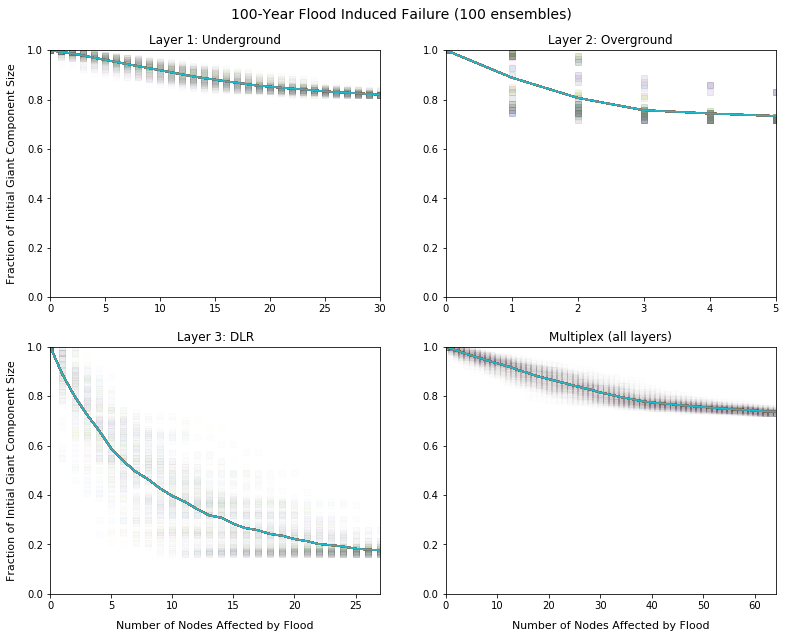

In [173]:
plt.figure(figsize=(13,10))

for i in range(100):
    
    plt.subplot(2,2,1)
    plt.plot(l1_node_frac, l1_gc_list_by_floods[i], 's', alpha=0.01)
    plt.plot(l1_node_frac, l1_gc_mean_by_floods)
    
    #plt.xlabel('Number of Nodes Affected', fontsize=12, labelpad=10)
    plt.ylabel('Fraction of Initial Giant Component Size', fontsize=11, labelpad=10)
    plt.title('Layer 1: Underground')
    plt.ylim([0,1])
    plt.margins(x=0, y=0)
    
    plt.subplot(2,2,2)
    plt.plot(l2_node_frac, l2_gc_list_by_floods[i],'s', alpha=0.05)
    plt.plot(l2_node_frac, l2_gc_mean_by_floods)
    
    #plt.xlabel('Number of Nodes Affected', fontsize=12, labelpad=10)
    #plt.ylabel('Fraction of Initial Giant Component Size', fontsize=12, labelpad=10)
    plt.title('Layer 2: Overground')
    plt.ylim([0,1])
    plt.margins(x=0, y=0)
    
    
    plt.subplot(2,2,3)
    plt.plot(l3_node_frac, l3_gc_list_by_floods[i],'s', alpha=0.01)
    plt.plot(l3_node_frac, l3_gc_mean_by_floods)
    
    plt.xlabel('Number of Nodes Affected by Flood', fontsize=11, labelpad=10)
    plt.ylabel('Fraction of Initial Giant Component Size', fontsize=11, labelpad=10)
    plt.title('Layer 3: DLR')
    plt.ylim([0,1])
    plt.margins(x=0, y=0)
    
    
    plt.subplot(2,2,4)
    plt.plot(agg_node_frac, agg_gc_list_by_floods[i],'s', alpha=0.005)
    plt.plot(agg_node_frac, agg_gc_mean_by_floods)
    
    plt.xlabel('Number of Nodes Affected by Flood', fontsize=11, labelpad=10)
    #plt.ylabel('Fraction of Initial Giant Component Size', fontsize=12, labelpad=10)
    plt.title('Multiplex (all layers)')
    plt.ylim([0,1])
    plt.margins(x=0, y=0)
    




#plt.subplots_adjust(wspace=0)
plt.suptitle('100-Year Flood Induced Failure (100 ensembles)', y=0.94, fontsize='14')
#plt.savefig('london-flood-ensemble.pdf')
plt.show()

In [176]:
1-l2_gc_mean_by_floods[-1]

0.2662714649838209